In [1]:
!pip install basemap==1.2.0 matplotlib==3.1

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement basemap==1.2.0 (from versions: 1.3.0b1, 1.3.0rc1, 1.3.0, 1.3.1, 1.3.2, 1.3.3, 1.3.4, 1.3.5, 1.3.6, 1.3.7, 1.3.8, 1.3.9, 1.4.0, 1.4.1)
ERROR: No matching distribution found for basemap==1.2.0


In [2]:
import numpy as np 
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
%matplotlib inline  
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning) 

### Data generation
The function below will generate the data points and requires these inputs:
<ul>
    <li> <b>centroidLocation</b>: Coordinates of the centroids that will generate the random data. </li>
    <ul> <li> Example: input: [[4,3], [2,-1], [-1,4]] </li> </ul>
    <li> <b>numSamples</b>: The number of data points we want generated, split over the number of centroids (# of centroids defined in centroidLocation) </li>
    <ul> <li> Example: 1500 </li> </ul>
    <li> <b>clusterDeviation</b>: The standard deviation of the clusters. The larger the number, the further the spacing of the data points within the clusters. </li>
    <ul> <li> Example: 0.5 </li> </ul>
</ul>


Smaller deviation creates tightly packed clusters, while a larger deviation creates more spread-out clusters.

In [3]:
def createdatacluster(centroidLocation,numSamples,clusterDeviation):
     x,y = make_blobs(n_samples=numSamples,centers=centroidLocation,cluster_std=clusterDeviation)# Create random data and store in feature matrix X and response vector y.
     x = StandardScaler().fit_transform(x)     # Standardize features by removing the mean and scaling to unit variance
     return x,y
    

Use createDataPoints with the 3 inputs and store the output into variables X and y.

In [4]:
x,y = createdatacluster([[4,3], [2,-1], [-1,4]],1500,0.5)

### Modeling
DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. This technique is one of the most common clustering algorithms  which works based on density of object.
The whole idea is that if a particular point belongs to a cluster, it should be near to lots of other points in that cluster.

It works based on two parameters: Epsilon and Minimum Points  
__Epsilon__ determine a specified radius that if includes enough number of points within, we call it dense area  
__minimumSamples__ determine the minimum number of data points we want in a neighborhood to define a cluster.



eps (Epsilon):

Defines the maximum distance between two points for them to be considered neighbors.
A small eps may result in too many small clusters or no clusters at all.
A large eps may group unrelated points into clusters.

min_samples:

The minimum number of points required in a neighborhood to consider a point as a core point.
Increasing min_samples makes it harder to form clusters (i.e., requires denser neighborhoods).

### Eg -:
labels_ is array([0, 0, 0, 1, 1, -1]).
The first three points ([1, 2], [2, 2], [3, 3]) are in cluster 0.
The next two points ([8, 8], [8, 9]) are in cluster 1.
The last point ([25, 80]) is labeled as -1, meaning it is noise and does not belong to any cluster.

In [5]:
epsilon = 0.3
minimumsample = 7
df = DBSCAN(eps=epsilon,min_samples=minimumsample).fit(x)
labels = df.labels_ # array([...]): data is stored in a NumPy array , dtype=int64: This  array contains 64-bit integers.
labels # labels_ contains the cluster labels assigned to each data point in the dataset.

array([0, 1, 2, ..., 1, 0, 2], dtype=int64)

### Distinguish outliers
Let's Replace all elements with 'True' in core_samples_mask that are in the cluster, 'False' if the points are outliers.


### core_samples_mask?
Definition: core_samples_mask is a boolean array that marks which data points are considered "core samples" by the DBSCAN algorithm.

Core samples are points that have at least min_samples points within a distance of eps (epsilon). These are the central points of clusters in DBSCAN.

If a data point is a core sample, the corresponding value in core_samples_mask will be True. Otherwise, it will be False.

 core_samples_mask -  same shape as db.labels_ - boolean values (True or False). , np.zeros_like() - create a new array filled with zeros

In [6]:
coresample_mask = np.zeros_like(df.labels_ , dtype=bool) # True: The points are core samples (part of a dense region in the cluster).
coresample_mask[df.core_sample_indices_] = True #False: The points are not core samples. These could be border points or noise points.
coresample_mask

array([ True,  True,  True, ...,  True,  True,  True])

### The code you provided calculates the number of clusters identified by DBSCAN, ignoring any noise points (which are labeled as -1 by DBSCAN)

### If the condition 
-2 in labels is -  False, 

the expression returns the value 0. 

This means that if -2 is not found in the labels array

other wise 1 

(1 - true , 0 - false)

In [7]:
# Number of clusters in labels, ignoring noise if present.
n_clusters = len(set(labels)) - (1 if -1 in labels else 0 )
n_clusters

3

expression set(labels) is used to remove duplicates from the labels array, as a set in Python is an unordered collection of unique elements. This operation will ensure that you only get distinct labels from the labels array, ignoring any repetitions.

labels = [0, 0, 1, 1, 2, 2, 0]

output - {0, 1, 2}



In [8]:
# Remove repetition in labels by turning it into a set.
uniq_labels = set(labels)
uniq_labels

{0, 1, 2}

### Data visualization


np.linspace(start, stop, num) is a function from NumPy that returns num evenly spaced values between start and stop (inclusive).

unique_labels = {0, 1, 2}, then len(unique_labels) is 3, so np.linspace(0, 1, 3) would generate:

plt.cm.Spectral() must lie between 0 and 1, because most colormaps in Matplotlib are defined on this interval.

In [9]:
colors = plt.cm.Spectral(np.linspace(0 , 1 , len(uniq_labels)))


### for k, col in zip(unique_labels, colors):
This loop iterates through the unique cluster labels (unique_labels) and the corresponding colors (colors) for each label. 
eg - : unpacking for loop 
for x , y in pairs(list1, list2) ,
 list 1 = 1,2,3, 
 list 2 = a,b,c 
 , output = x1,ya

 ### class_member_mask = (labels == k) Eg - :
 Cluster analysis with labels
data = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
labels = np.array([0, 1, 1, 0])  # Cluster labels
k = 1  # Cluster of interest

 Mask for cluster 1
cluster_data = data[labels == k]
print(cluster_data)
 Output: [[3, 4], [5, 6]]


### xy = X[class_member_mask & core_samples_mask]

class_member_mask & core_samples_mask:  AND operation. -

 both:

1 ) Members of the current cluster k.
2 )Core points of that cluster.


### plt.scatter(xy[:,0],xy[:,1],s = 50 , c = [col] , marker=u'o',alpha=.6)

xy[:, 0] selects all rows (:) and the first column (0), - x-coordinates.

xy[:, 1]: - y-coordinates of the data points in the subset xy.

s=50:Specifies the size of each marker in the scatter plot. Larger values result in bigger points.

c=[col]: Specifies the color of the markers. Here, col is a variable containing the color value (e.g., 'red', 'blue', or an RGB/hex color code).

marker=u'o': Specifies the shape of the marker. The u'o' indicates a circular marker ('o' is a common choice in scatter plots).


alpha=0.5: Sets the transparency of the markers. A value of 0.5 makes the markers semi-transparent, which is useful for visualizing overlapping points

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


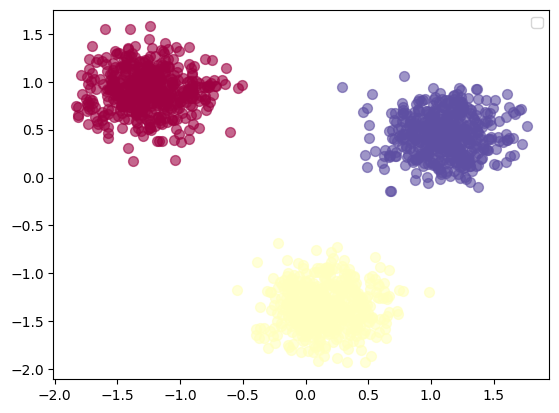

In [10]:
for k , col in zip(uniq_labels , colors):
    if k == -1 :
        col = 'k'  # Black used for noise.
    class_member_mask = (labels == k) # boolean mask - labels array to k, returning True for points belonging to the cluster and False otherwise.

    xy = x[class_member_mask & coresample_mask ] # Filters the dataset X to extract the points that satisfy both conditions.
    plt.scatter(xy[:,0] , xy[:,1] , s = 50 , c = [col] , marker=u'o' ,alpha=.6)

    ## Plot the outliers

    xy = x[class_member_mask & ~coresample_mask] # filter boundary points in clustering, specifically in algorithms like DBSCAN.
    plt.scatter(xy[:,0],xy[:,1],s = 50 , c = [col] , marker=u'o',alpha=.6)

    # Add a legend
plt.legend()

file_path = r"T:\My Drive\000 ihsan\02 Courses\003GIT\MYProject\Ml_project_IBM\DBSCAN Clustering\Plot\cluster_3.1.jpg"
plt.savefig(file_path, format='jpg', dpi=300)

plt.show()

# Complete 

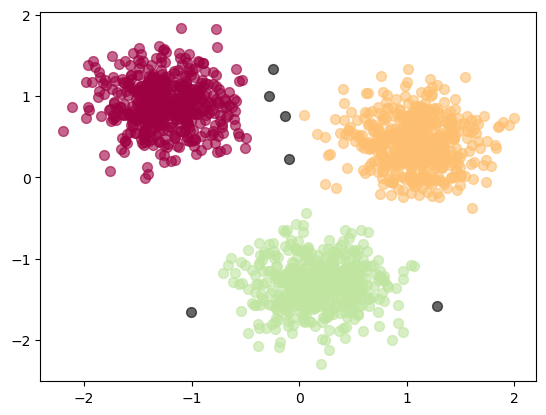

In [11]:
def createdatacluster(centroidLocation,numSamples,clusterDeviation):
     x,y = make_blobs(n_samples=numSamples,centers=centroidLocation,cluster_std=clusterDeviation)# Create random data and store in feature matrix X and response vector y.
     x = StandardScaler().fit_transform(x)     # Standardize features by removing the mean and scaling to unit variance
     return x,y

x,y = createdatacluster([[4,3], [2,-1], [-1,4]],1500,0.7)

epsilon = 0.3
minimumsample = 7
df = DBSCAN(eps=epsilon,min_samples=minimumsample).fit(x)
labels = df.labels_ # array([...]): data is stored in a NumPy array , dtype=int64: This  array contains 64-bit integers.
labels # labels_ contains the cluster labels assigned to each data point in the dataset.

coresample_mask = np.zeros_like(df.labels_ , dtype=bool) # True: The points are core samples (part of a dense region in the cluster).
coresample_mask[df.core_sample_indices_] = True #False: The points are not core samples. These could be border points or noise points.
coresample_mask

# Number of clusters in labels, ignoring noise if present.
n_clusters = len(set(labels)) - (1 if -1 in labels else 0 )
n_clusters

# Remove repetition in labels by turning it into a set.
uniq_labels = set(labels)
uniq_labels

colors = plt.cm.Spectral(np.linspace(0 , 1 , len(uniq_labels)))

for k , col in zip(uniq_labels , colors):
    if k == -1 :
        col = 'k'  # Black used for noise.
    class_member_mask = (labels == k) # boolean mask - labels array to k, returning True for points belonging to the cluster and False otherwise.

    xy = x[class_member_mask & coresample_mask ] # Filters the dataset X to extract the points that satisfy both conditions.
    plt.scatter(xy[:,0] , xy[:,1] , s = 50 , c = [col] , marker=u'o' ,alpha=.6)

    ## Plot the outliers

    xy = x[class_member_mask & ~coresample_mask] # filter boundary points in clustering, specifically in algorithms like DBSCAN.
    plt.scatter(xy[:,0],xy[:,1],s = 50 , c = [col] , marker=u'o',alpha=.6)



file_path = r"T:\My Drive\000 ihsan\02 Courses\003GIT\MYProject\Ml_project_IBM\DBSCAN Clustering\Plot\cluster_3.2.jpg"
plt.savefig(file_path, format='jpg', dpi=300)

plt.show()


# Practice

Means clustering model with 3 clusters. The kmeans_3 object can then be fitted to your data to assign cluster labels and determine the centroids

c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\admin\AppData\Local\Temp\ipykernel_15268\2325092373.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which s

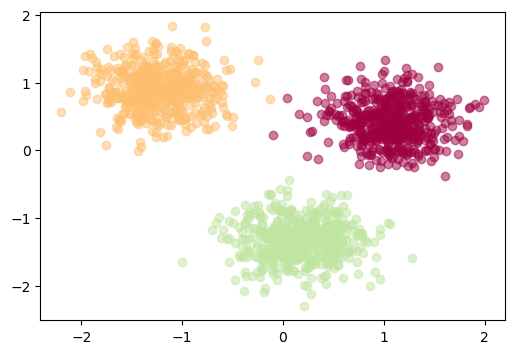

In [12]:
from sklearn.cluster import KMeans
k = 3 # number of clusters to form.
kmeans_3 = KMeans(init="k-means++" , n_clusters=k , n_init=12) # algorithm will run 12 times with different centroid seeds, and the best solution will be selected. 
kmeans_3.fit(x)
fig = plt.figure(figsize=(6,4)) # new canvas or plotting area , dimensions of the figure in inches.6,4
ax = fig.add_subplot(1,1,1)# add_subplot(nrows, ncols, index)
for k , col in zip (range(k), colors) :
    mymembers = (kmeans_3.labels_ == k) # labels generated by the K-Means algorithm , true - this cluster , false - not this cluster
    plt.scatter(x[mymembers,0],x[mymembers,1], c= col , marker=u'o',alpha=0.5) #only the values from the first feature of the rows where my_members is True.

file_path = r"T:\My Drive\000 ihsan\02 Courses\003GIT\MYProject\Ml_project_IBM\DBSCAN Clustering\Plot\cluster_KMeans_3.jpg"
plt.savefig(file_path, format='jpg', dpi=300)

plt.show()




<h1 align=center> Weather Station Clustering using DBSCAN & scikit-learn </h1>
<hr>

DBSCAN is especially very good for tasks like class identification in a spatial context. The wonderful attribute of DBSCAN algorithm is that it can find out any arbitrary shape cluster without getting affected by noise. For example, this following example cluster the location of weather stations in Canada.
<Click 1>
DBSCAN can be used here, for instance, to find the group of stations which show the same weather condition. As you can see, it not only finds different arbitrary shaped clusters, can find the denser part of data-centered samples by ignoring less-dense areas or noises.

Let's start playing with the data. We will be working according to the following workflow: </font>
1. Loading data
- Overview data
- Data cleaning
- Data selection
- Clusteing


### About the dataset

		
<h4 align = "center">
Environment Canada    
Monthly Values for July - 2015	
</h4>
<html>
<head>
<style>
table {
    font-family: arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
}

td, th {
    border: 1px solid #dddddd;
    text-align: left;
    padding: 8px;
}

tr:nth-child(even) {
    background-color: #dddddd;
}
</style>
</head>
<body>

<table>
  <tr>
    <th>Name in the table</th>
    <th>Meaning</th>
  </tr>
  <tr>
    <td><font color = "green"><strong>Stn_Name</font></td>
    <td><font color = "green"><strong>Station Name</font</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Lat</font></td>
    <td><font color = "green"><strong>Latitude (North+, degrees)</font></td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Long</font></td>
    <td><font color = "green"><strong>Longitude (West - , degrees)</font></td>
  </tr>
  <tr>
    <td>Prov</td>
    <td>Province</td>
  </tr>
  <tr>
    <td>Tm</td>
    <td>Mean Temperature (°C)</td>
  </tr>
  <tr>
    <td>DwTm</td>
    <td>Days without Valid Mean Temperature</td>
  </tr>
  <tr>
    <td>D</td>
    <td>Mean Temperature difference from Normal (1981-2010) (°C)</td>
  </tr>
  <tr>
    <td><font color = "black">Tx</font></td>
    <td><font color = "black">Highest Monthly Maximum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTx</td>
    <td>Days without Valid Maximum Temperature</td>
  </tr>
  <tr>
    <td><font color = "black">Tn</font></td>
    <td><font color = "black">Lowest Monthly Minimum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTn</td>
    <td>Days without Valid Minimum Temperature</td>
  </tr>
  <tr>
    <td>S</td>
    <td>Snowfall (cm)</td>
  </tr>
  <tr>
    <td>DwS</td>
    <td>Days without Valid Snowfall</td>
  </tr>
  <tr>
    <td>S%N</td>
    <td>Percent of Normal (1981-2010) Snowfall</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>P</font></td>
    <td><font color = "green"><strong>Total Precipitation (mm)</font></td>
  </tr>
  <tr>
    <td>DwP</td>
    <td>Days without Valid Precipitation</td>
  </tr>
  <tr>
    <td>P%N</td>
    <td>Percent of Normal (1981-2010) Precipitation</td>
  </tr>
  <tr>
    <td>S_G</td>
    <td>Snow on the ground at the end of the month (cm)</td>
  </tr>
  <tr>
    <td>Pd</td>
    <td>Number of days with Precipitation 1.0 mm or more</td>
  </tr>
  <tr>
    <td>BS</td>
    <td>Bright Sunshine (hours)</td>
  </tr>
  <tr>
    <td>DwBS</td>
    <td>Days without Valid Bright Sunshine</td>
  </tr>
  <tr>
    <td>BS%</td>
    <td>Percent of Normal (1981-2010) Bright Sunshine</td>
  </tr>
  <tr>
    <td>HDD</td>
    <td>Degree Days below 18 °C</td>
  </tr>
  <tr>
    <td>CDD</td>
    <td>Degree Days above 18 °C</td>
  </tr>
  <tr>
    <td>Stn_No</td>
    <td>Climate station identifier (first 3 digits indicate   drainage basin, last 4 characters are for sorting alphabetically).</td>
  </tr>
  <tr>
    <td>NA</td>
    <td>Not Available</td>
  </tr>


</table>

</body>
</html>

 


### 2- Load the dataset
We will import the .csv then we creates the columns for year, month and day.


In [13]:
import csv
import pandas as pd 
import numpy as np 

df = pd.read_csv(r"T:\My Drive\000 ihsan\02 Courses\003GIT\MYProject\Ml_project_IBM\DBSCAN Clustering\Data\weather-stations20140101-20141231.csv")
df.head(5)


,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


### 3-Cleaning
Let's remove rows that don't have any value in the __Tm__ field.


In [14]:
df = df[pd.notnull(df["Tm"])] # Only rows with non-null values in the "Tm" column
df = df.reset_index(drop=True) # drop=True old index is not added , new column in the DataFrame.
df.head(5)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
4,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,...,8.0,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710


### 4-Visualization

Subsetting Data:

For instance, if the original dataset contains worldwide data (e.g., weather stations or cities), this code extracts only the points within a specific region.
Visualization:

Filtered data can be plotted on a map to show only relevant locations within the specified latitude and longitude range.
Regional Analysis:

Perform calculations or analyses (e.g., average temperature, population density) for a specific region by narrowing down the dataset.

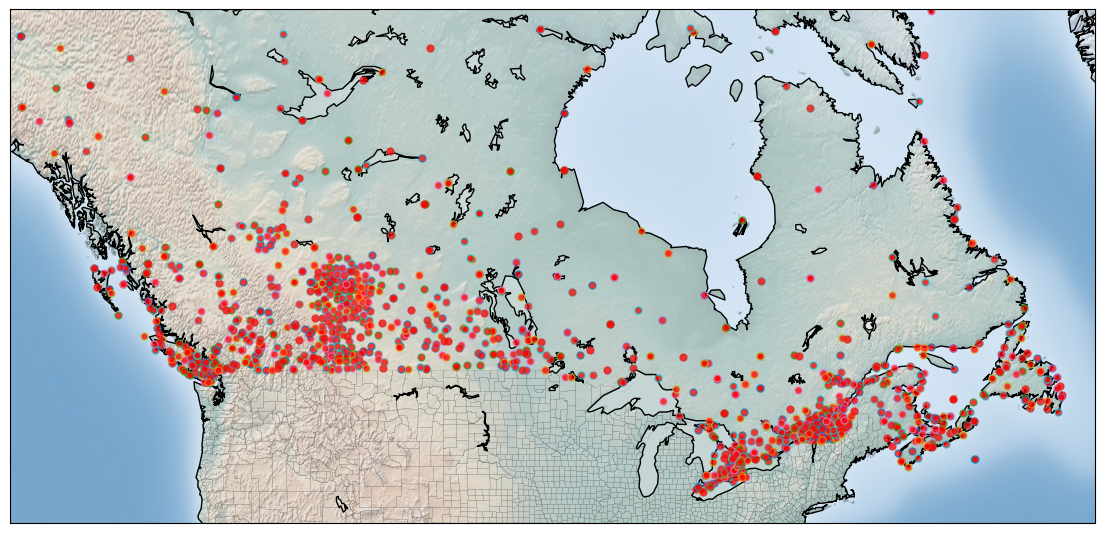

In [15]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt 
from pylab import rcParams
%matplotlib inline 

rcParams['figure.figsize'] = (14,10) # figure.figsize': A key in rcParams that sets the default width and height (in inches) of Matplotlib figures.

llon = -140  # lower longitude)
ulon = -50 # upper longitude
llat = 40 # lower latitude
ulat = 65 # upper latitude

df = df[(df['Long'] > llon) & (df['Long'] < ulon) & (df['Lat'] > llat) & (df['Lat'] < ulat)]  # dataset contains worldwide data , extracts only the points within a specific region

my_map = Basemap(projection='merc',  # Mercator projection, which is widely used for navigation and displays latitude and longitude lines as straight and perpendicular.
                 resolution='l',      #Sets the resolution of the map(low)
                 area_thresh=1000,    # Ignores smaller land features , below the specified threshold area (like tiny islands)
                 llcrnrlon=llon, llcrnrlat=llat,  # lower-left corner of the map (minimum longitude and latitude).
                 urcrnrlon=ulon, urcrnrlat=ulat)  # upper-right corner of the map (maximum longitude and latitude).

my_map.drawcoastlines() # outlining the edges of land masses and islands , defining boundaries between water and land.
my_map.drawcounties() # Draws the boundaries of countries
#my_map.drawmapboundary() # visually separate the map area from empty space around it.
my_map.fillcontinents(color='white' , alpha=0.3) # Fills the landmasses with a white color to differentiate them from water., fill semi-transparent
my_map.shadedrelief() # visually represents the topography (elevation, terrain) of the region.

xs,ys = my_map(np.asarray(df.Long),np.asarray(df.Lat)) # convert pd-np , 

df['xm'] = xs.tolist() # x-coordinate array (xs)  .tolist() and adds  new column (xm)  DataFrame.
df['ym'] = ys.tolist() # .tolist()  convert NumPy arrays to Python lists 

for index , row in df.iterrows():# iterrows - you to access each row one by one , both the index and the row data Eg-: Index: 0 Name: Alice, Age: 25, City: New York
  #x,y = my_map(row.Long, row.Lat)
  my_map.plot(row.xm,row.ym,markerfacecolor = [1,0,0],marker = 'o',markersize = 5,alpha = 0.75) # x and y projection coordinates from the df , [1, 0, 0] is the RGB color code for red. ,marker shape should be a circle.,size of the marker,transparency of the markers

file_path = r"T:\My Drive\000 ihsan\02 Courses\003GIT\MYProject\Ml_project_IBM\DBSCAN Clustering\Plot\weather_Station_Clustering_1.jpg"
plt.savefig(file_path, format='jpg', dpi=300)

plt.show()



### 5- Clustering of stations based on their location i.e. Lat & Lon

__DBSCAN__ form sklearn library can run DBSCAN clustering from vector array or distance matrix. In our case, we pass it the Numpy array Clus_dataSet to find core samples of high density and expands clusters from them. 


In [16]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000) # providing a fixed seed value (1000), random numbers you ensure that every time you run the code, the results will be the same.

clus_dataset = df[['xm','ym']] # extracts the xm and ym columns
clus_dataset = np.nan_to_num(clus_dataset)# NaN (Not a Number) values in the Clus_dataSet are replaced with zeros
clus_dataset = StandardScaler().fit_transform(clus_dataset) # scales the dataset so that it has a mean of 0 and a standard deviation of 1

db = DBSCAN(eps=0.15,min_samples=10).fit(clus_dataset)
coresample_mask = np.zeros_like(db.labels_,dtype=bool)
coresample_mask[db.core_sample_indices_] = True

labels = db.labels_
df['Clus_Db'] = labels

real_cluster_num = len(set(labels)) - (1 if -1 in labels else 0)
cluster_num = len(set(labels))

df[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)




,Stn_Name,Tx,Tm,Clus_Db
0,CHEMAINUS,13.5,8.2,0
1,COWICHAN LAKE FORESTRY,15.0,7.0,0
2,LAKE COWICHAN,16.0,6.8,0
3,DUNCAN KELVIN CREEK,14.5,7.7,0
4,ESQUIMALT HARBOUR,13.1,8.8,0


In [17]:
set(labels)

{-1, 0, 1, 2, 3, 4}

### 6- Visualization of clusters based on location
Now, we can visualize the clusters using basemap:


Cluster 0, Avg Temp: -5.538747553816046
Cluster 1, Avg Temp: 1.9526315789473685
Cluster 2, Avg Temp: -9.195652173913045
Cluster 3, Avg Temp: -15.300833333333333
Cluster 4, Avg Temp: -7.769047619047619


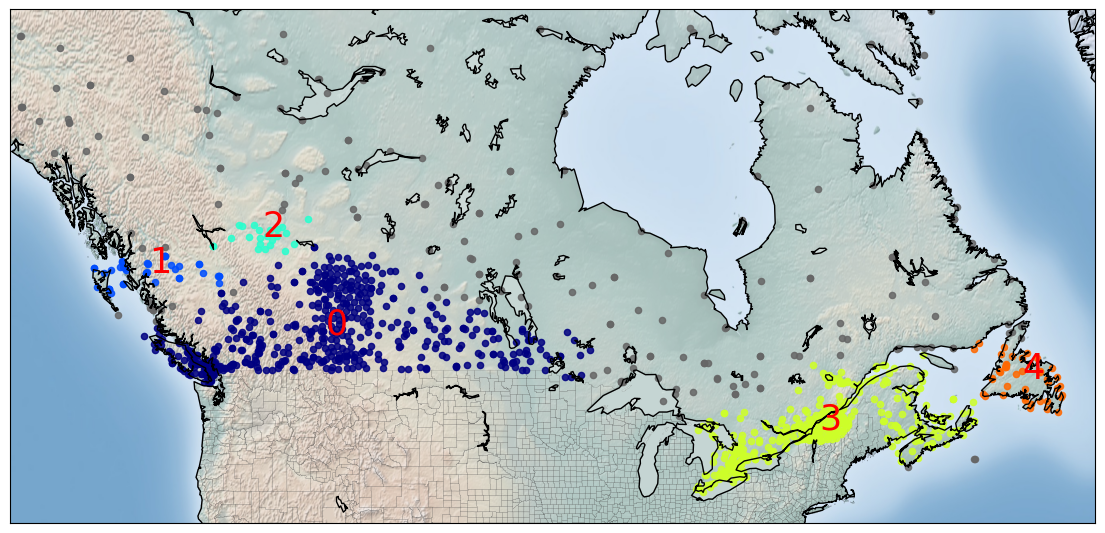

In [18]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc', resolution='l', area_thresh=1000 , llcrnrlon=llon , llcrnrlat=llat , urcrnrlon = ulon , urcrnrlat=ulat )

my_map.drawcoastlines()
my_map.drawcounties()
my_map.fillcontinents(color='white',alpha=0.3)
my_map.shadedrelief()

colors = plt.get_cmap('jet')(np.linspace(0.0,1,cluster_num)) # jet colormap - starts with blue, transitions to cyan, yellow, and ends with red ,values between 0.0 and 1.0, with a total of clusterNum values.

#Visualization1
for cluster_num in set(labels):
    c = (([.4,.4,.4]) if cluster_num == -1 else colors[int(cluster_num)]) # cluster number is -1 color - shade of gray ([0.4, 0.4, 0.4])., otherwise colors -converting the cluster number to an integer index using np.int(clust_number).
    clus_set = df[df.Clus_Db == cluster_num] # clust_set filters the df DataFrame and selects the rows where the Clus_Db column matches the current cluster number (clust_number).
    my_map.scatter(clus_set.xm,clus_set.ym,color = c,marker = 'o',s=20,alpha = 0.85) # clust_set.xm and clust_set.ym are the x and y coordinates ,marker='o': circle,s=20:size marker.
    
    if cluster_num !=-1: #cluster number is not -1 (i.e., it's a valid cluster), the code computes the centroid of the cluster:
        cenx = np.mean(clus_set.xm) # mean x-coordinate (longitude) of the cluster
        ceny = np.mean(clus_set.ym) # mean y-coordinate (latitude) of the cluster.

        plt.text(cenx,ceny,str(cluster_num),fontsize = 25,color='red') #25-size of text , convert a variable (typically a number) to a string

        print ("Cluster "+str(cluster_num)+', Avg Temp: '+ str(np.mean(clus_set.Tm)))

file_path = r"T:\My Drive\000 ihsan\02 Courses\003GIT\MYProject\Ml_project_IBM\DBSCAN Clustering\Plot\Clustering of stations based on their location.jpg"
plt.savefig(file_path, format='jpg', dpi=300)

plt.show()





### 7- Clustering of stations based on their location, mean, max, and min Temperature
In this section we re-run DBSCAN, but this time on a 5-dimensional dataset:


In [19]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

sklearn.utils.check_random_state(1000) # random number generator (RNG) state is properly initialized for reproducibility in machine learning tasks.

clus_dataset = df[['xm','ym','Tx','Tm','Tn']]
clus_dataset = np.nan_to_num(clus_dataset)
clus_dataset = StandardScaler().fit_transform(clus_dataset)

# Compute DBSCAN
db = DBSCAN(eps = 0.3,min_samples=10).fit(clus_dataset)
coresample_mask = np.zeros_like(db.labels_,dtype=bool)
coresample_mask[db.core_sample_indices_] = True

labels = db.labels_
df["Clus_Db"] = labels

real_cluster_num = len(set(labels)) - (1 if -1 in labels else 0)
clust_num = len(set(labels))

# A sample of clusters
df[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)



,Stn_Name,Tx,Tm,Clus_Db
0,CHEMAINUS,13.5,8.2,0
1,COWICHAN LAKE FORESTRY,15.0,7.0,0
2,LAKE COWICHAN,16.0,6.8,0
3,DUNCAN KELVIN CREEK,14.5,7.7,0
4,ESQUIMALT HARBOUR,13.1,8.8,0


### 8- Visualization of clusters based on location and Temperture


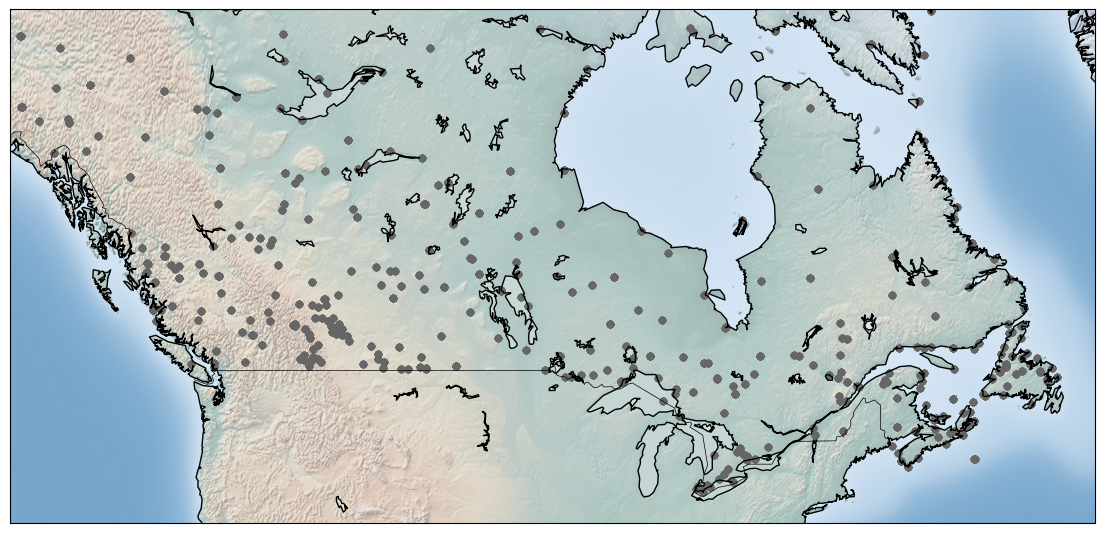

In [20]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',resolution='l',area_thresh=1000,llcrnrlon=llon,llcrnrlat=llat,urcrnrlon=ulon,urcrnrlat=ulat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='white',alpha=0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0,1,clust_num))

#Visualization1
for clust_num in set(labels):
    c = (([.4,.4,.4]) if cluster_num == -1 else colors[int(cluster_num)])
    clust_set = df[df.Clus_Db == cluster_num]
    my_map.scatter(clust_set.xm,clust_set.ym,color = c , marker = 'o' , s=20,alpha = 0.85)

    if cluster_num != -1 :
        cenx = np.mean(clust_set.xm)
        ceny = np.mean(clust_set.ym)
        plt.text(cenx,ceny,str(cluster_num),fontsize = 25,color = 'red')

        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.Tm)))

file_path = r"T:\My Drive\000 ihsan\02 Courses\003GIT\MYProject\Ml_project_IBM\DBSCAN Clustering\Plot\Cbl_mean_max_min_Temp.jpg"
plt.savefig(file_path, format='jpg', dpi=300)

plt.show()